# Polynomal regression with one variable

Demonstration of polynomial regression on one variable.

Refs:
* https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

## Generate data

We'll generate some random data to do our polynomail regression on.

In [2]:
# Generate random numbers between 0 and pi/2
n_samples = 100
x = np.random.random(n_samples) * math.pi/2

x = np.sort(x)
y = np.sin(x)

In [3]:
# Make the data "messier" by adding Gaussian blur
sigma = 0.05
x_true = x
y_true = y

x_blur = np.random.randn(n_samples) * sigma
x = x + x_blur

y_blur = np.random.randn(n_samples) * sigma
y = y + y_blur

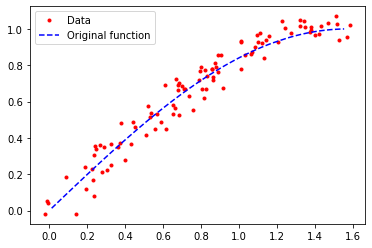

In [4]:
plt.plot(x, y, 'r.', label='Data')
plt.plot(x_true, y_true, 'b--', label='Original function')
plt.legend()
plt.show()

## Split into train and test data

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
# Sort arrays so they plot nicely
order_train = np.argsort(x_train)
x_train = x_train[order_train]
y_train = y_train[order_train]

order_test = np.argsort(x_test)
x_test = x_test[order_test]
y_test = y_test[order_test]

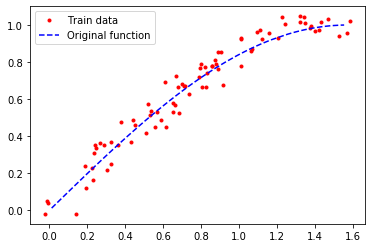

In [7]:
plt.plot(x_train, y_train, 'r.', label='Train data')
plt.plot(x_true, y_true, 'b--', label='Original function')
plt.legend()
plt.show()

## Train and test

In [8]:
# LinearRegression() needs 2D input
x_train = x_train[:, np.newaxis]
x_test = x_test[:, np.newaxis]

We'll demonstrate underfit, good fit, and overfit by using three different order polynomials.

In [9]:
# Orders of polynomials
degrees = [1, 3, 10]

plot_titles=['Underfit', 'Good fit', 'Overfit']
n_degrees = len(degrees)

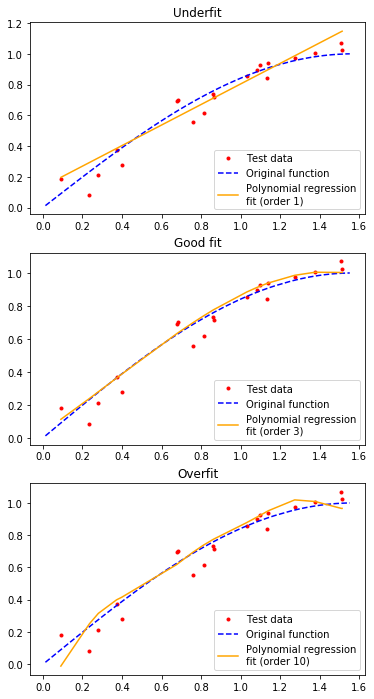

In [10]:
plt.figure(figsize=(6, 12))
for i in range(n_degrees):
    # Train
    model = Pipeline([('polynomial', PolynomialFeatures(degree=degrees[i])),
                     ('linear', LinearRegression())])

    model.fit(x_train, y_train)
    
    # Predict
    y_pred = model.predict(x_test)

    # Plot
    plt.subplot(n_degrees, 1, i+1)
    plt.plot(x_test, y_test, 'r.', label='Test data')
    plt.plot(x_true, y_true, 'b--', label='Original function')
    plt.plot(x_test, y_pred, color='orange',
             label='Polynomial regression\nfit (order %d)' %(degrees[i]))
    plt.title(plot_titles[i])
    plt.legend(loc='lower right')

plt.show()